# DBSCAN Clustering Graphs for Heart Disease

Perform DBSCAN clustering from vector array or distance matrix.

**DBSCAN** - *Density-Based Spatial Clustering* of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.

## Business Logic

With the dataset of Heart Disease, I am using "Age" attribute with other attributes to analyze which age group is more prone towards Heart Disease. So in the dataset we have a total of 14 columns, each column is a feature data which directly helps in predicting the heart disease existence. Considering the "target" column as the prediction result, I have used unsupervised clustering of K-Means to figure out different clusters of 2 different columns. 
Such as:

*   Age : Cholesterol
*   Age : Resting Blood Pressure
*   Age : Max Heart Beats
*   Age : ST Depression

## Objective

To analyze which Age group is more prone for a Heart Disease.

In [ ]:
pip install pycaret


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import tensorflow as tf
from past.builtins import xrange
from itertools import cycle, islice
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates

%matplotlib inline

# Creating a Pandas DataFrame from a CSV file

In [ ]:
filename = "https://raw.githubusercontent.com/AnishaA-git/Heart_Disease/master/heart.csv"
df = pd.read_csv(filename, sep=',', nrows=304)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.shape


(303, 14)

# Data Wrangling

In [ ]:
df = df.rename(columns={"age": "Age", "cp": "ChestPain", "trestbps": "Resting Blood Pressure",
                   "chol": "Cholesterol", "thalach": "Max Heart Beats", "oldpeak": "ST Depression"})
df

,Age,sex,ChestPain,Resting Blood Pressure,Cholesterol,fbs,restecg,Max Heart Beats,exang,ST Depression,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.head()

,Age,sex,ChestPain,Resting Blood Pressure,Cholesterol,fbs,restecg,Max Heart Beats,exang,ST Depression,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Sampling and Data Decscription

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
ChestPain,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
Resting Blood Pressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
Cholesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
Max Heart Beats,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
ST Depression,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [ ]:
df.columns

Index(['Age', 'sex', 'ChestPain', 'Resting Blood Pressure', 'Cholesterol',
       'fbs', 'restecg', 'Max Heart Beats', 'exang', 'ST Depression', 'slope',
       'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
data = df.sample(frac=0.95, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (288, 14)
Unseen Data For Predictions: (15, 14)


In [ ]:
from pycaret.clustering import *

exp_clu101 = setup(data, normalize = True, 
                   session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(288, 14)"
2,Missing Values,False
3,Numeric Features,5
4,Categorical Features,9
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(288, 32)"
9,CPU Jobs,-1


# Code Snippet for Scikit Clustering

In [ ]:
def dbscan_clustering_scikit(col1,col2):
  best_cols=[col1.name,col2.name]
  # kmeans = KMeans(n_clusters=6, init ="k-means++", n_init=10, max_iter=300)
  dbscan = DBSCAN(eps=0.5,min_samples=5)

  best_vals = df[best_cols].iloc[ :, [0,1]].values
  # y_pred = kmeans.fit_predict(best_vals)

  y_pred = dbscan.fit_predict(best_vals)


  df["cluster"] = y_pred
  dbscan.labels_

  best_cols.append("cluster")
  sns.lmplot(data=df, x=col1.name, y=col2.name, fit_reg=False, legend=True, legend_out=True)


# For AGE and Cholesterol

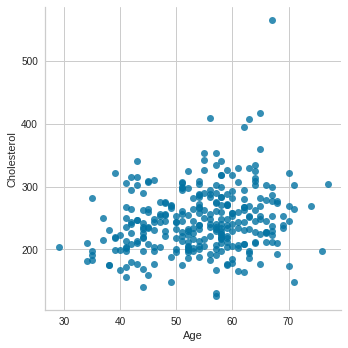

In [ ]:
dbscan_clustering_scikit(df['Age'], df['Cholesterol'])

# For Age and Resting Blood Pressure

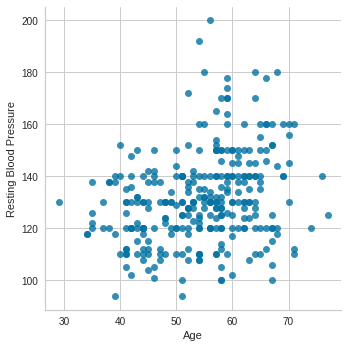

In [ ]:
dbscan_clustering_scikit(df['Age'], df['Resting Blood Pressure'])

# For Age and Max Heart Beats

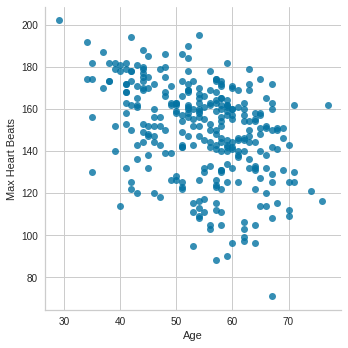

In [ ]:
dbscan_clustering_scikit(df['Age'], df['Max Heart Beats'])

# For Age and ST Depression

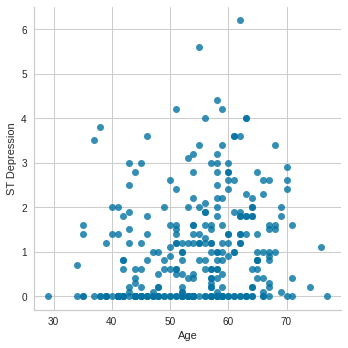

In [ ]:
dbscan_clustering_scikit(df['Age'], df['ST Depression'])

In [ ]:
dbscan = create_model('dbscan')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


# Plotting of DBSCAN

In [ ]:
plot_model(dbscan)


In [ ]:
print(dbscan)


DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=6, n_jobs=-1, p=None)
